In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
import folium


df = pd.read_csv('/kaggle/input/real-estate-goldmine-dubai-uae-rental-market/dubai_properties.csv')
df.head()
print("")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73742 entries, 0 to 73741
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 73742 non-null  object 
 1   Rent                    73742 non-null  int64  
 2   Beds                    73742 non-null  int64  
 3   Baths                   73742 non-null  int64  
 4   Type                    73742 non-null  object 
 5   Area_in_sqft            73742 non-null  int64  
 6   Rent_per_sqft           73742 non-null  float64
 7   Rent_category           73742 non-null  object 
 8   Frequency               73742 non-null  object 
 9   Furnishing              73742 non-null  object 
 10  Purpose                 73742 non-null  object 
 11  Posted_date             73742 non-null  object 
 12  Age_of_listing_in_days  73742 non-null  int64  
 13  Location                73742 non-null  object 
 14  City                    73742 non-nul

In [2]:
df["Posted_date"] = pd.to_datetime(df["Posted_date"])

# Ensure categoricals are categorical
cat_cols = ["Type", "Frequency", "Furnishing", "Purpose", "Rent_category", "City", "Location"]
for col in cat_cols:
    df[col] = df[col].astype("category")

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


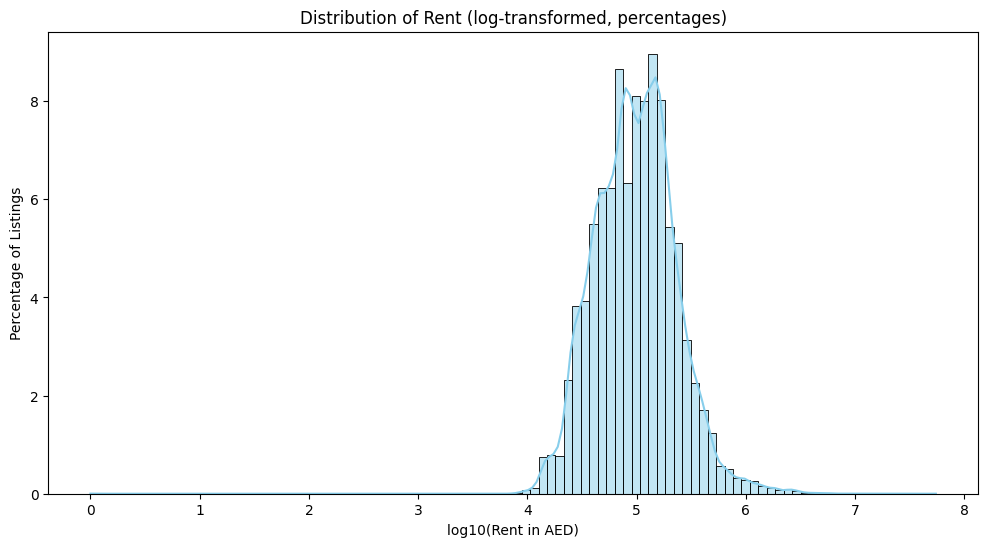

In [3]:
plt.figure(figsize=(12,6))
sns.histplot(np.log10(df["Rent"]), bins=100, stat="percent", kde=True, color="skyblue", edgecolor="black")
plt.xlabel("log10(Rent in AED)")
plt.ylabel("Percentage of Listings")
plt.title("Distribution of Rent (log-transformed, percentages)")
plt.show()

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


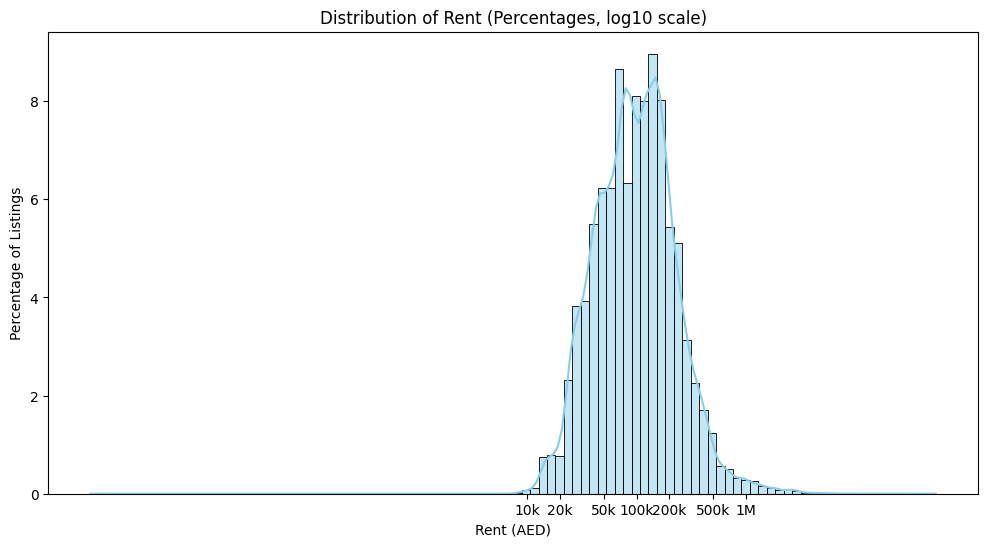

In [4]:
plt.figure(figsize=(12,6))

# Log10-transform Rent
rent_log = np.log10(df["Rent"])

# Histogram with percentage + KDE
sns.histplot(rent_log, bins=100, stat="percent", kde=True, color="skyblue", edgecolor="black")

# Convert x-axis ticks from log10 to AED for readability
# Example ticks at 10k, 20k, 50k, 100k, 200k, 500k, 1M
tick_values = [4, 4.3, 4.7, 5, 5.3, 5.7, 6]
tick_labels = ["10k", "20k", "50k", "100k", "200k", "500k", "1M"]
plt.xticks(tick_values, tick_labels)

plt.xlabel("Rent (AED)")
plt.ylabel("Percentage of Listings")
plt.title("Distribution of Rent (Percentages, log10 scale)")

plt.show()

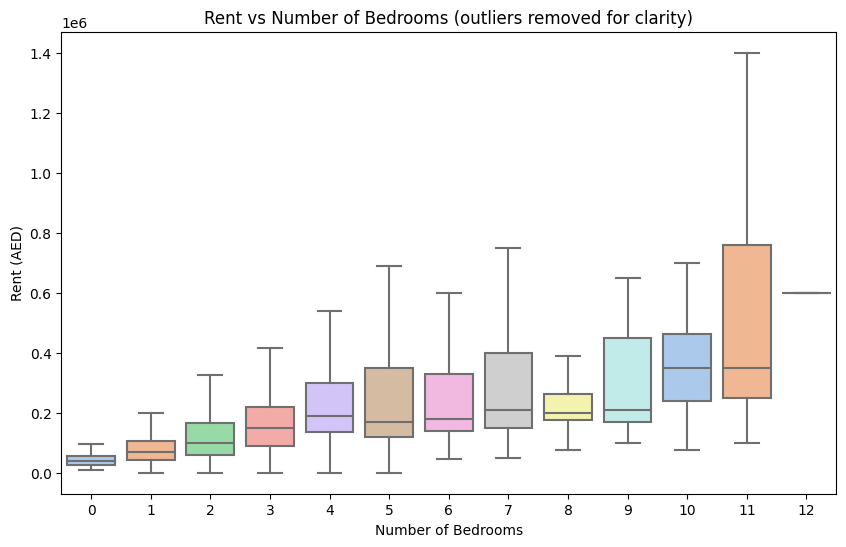

In [5]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Beds", y="Rent", data=df, showfliers=False, palette="pastel")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Rent (AED)")
plt.title("Rent vs Number of Bedrooms (outliers removed for clarity)")
plt.show()

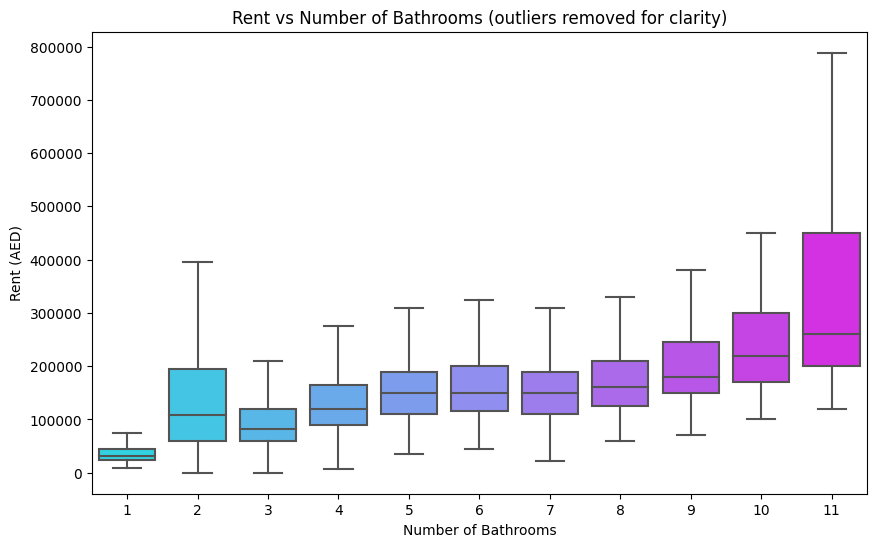

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Baths", y="Rent", data=df, showfliers=False, palette="cool")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Rent (AED)")
plt.title("Rent vs Number of Bathrooms (outliers removed for clarity)")
plt.show()

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


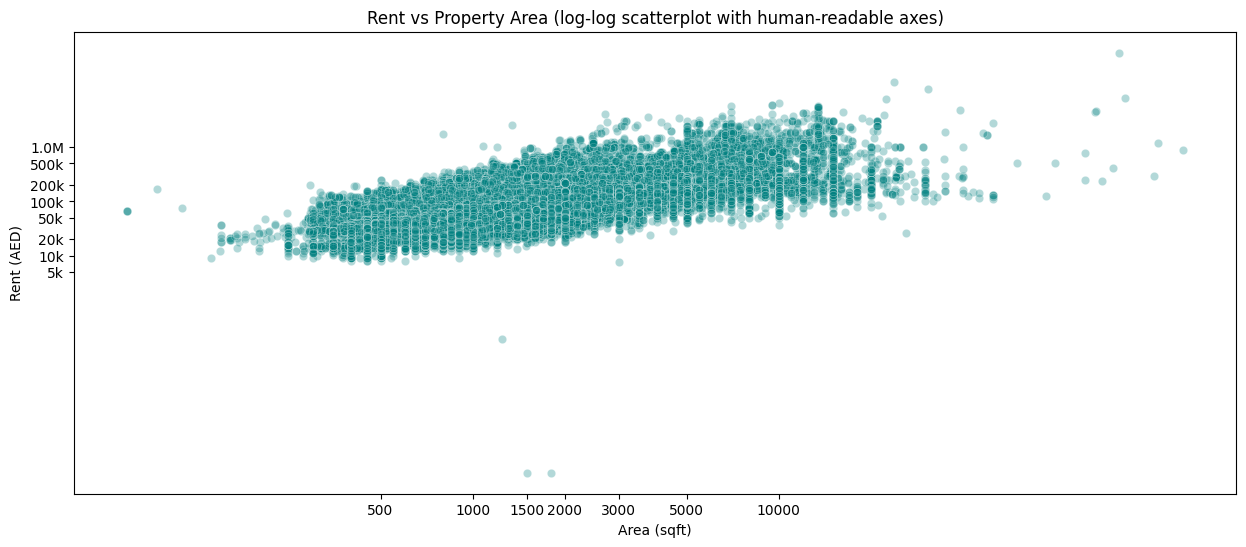

In [7]:
plt.figure(figsize=(15,6))

# Log-transform but keep original values for tick labels
x = df["Area_in_sqft"]
y = df["Rent"]

sns.scatterplot(x=np.log10(x), y=np.log10(y), alpha=0.3, color="teal")

# Set x-axis ticks (area in sqft)
area_ticks = [500, 1000, 1500, 2000, 3000, 5000, 10000]
plt.xticks(np.log10(area_ticks), [f"{t}" for t in area_ticks])

# Set y-axis ticks (Rent in AED)
rent_ticks = [5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000]
plt.yticks(np.log10(rent_ticks), [f"{t/1000:.0f}k" if t < 1_000_000 else f"{t/1_000_000:.1f}M" for t in rent_ticks])

plt.xlabel("Area (sqft)")
plt.ylabel("Rent (AED)")
plt.title("Rent vs Property Area (log-log scatterplot with human-readable axes)")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


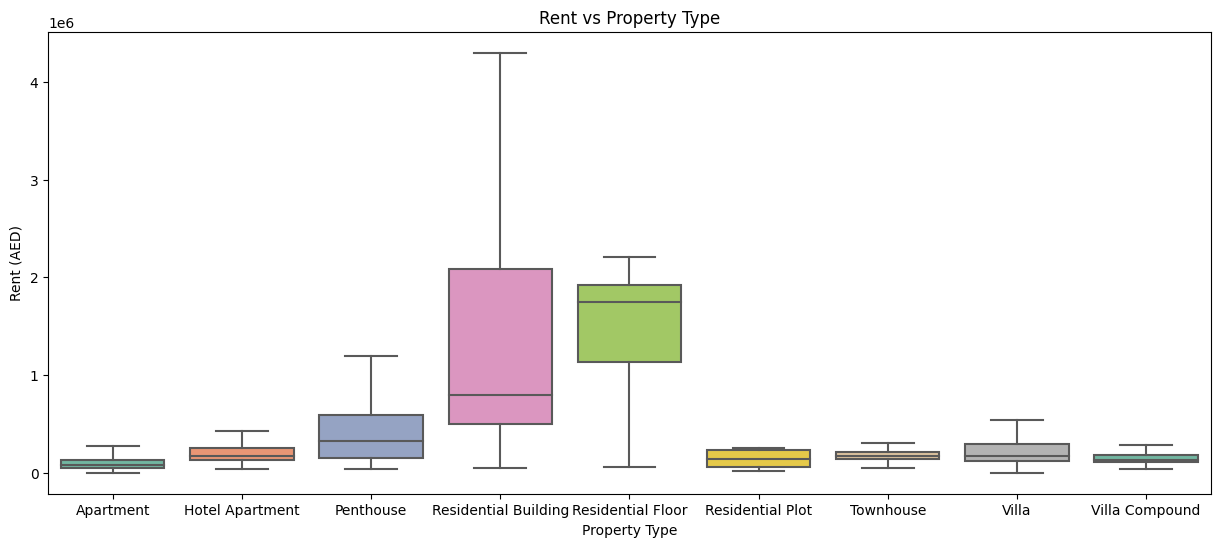

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


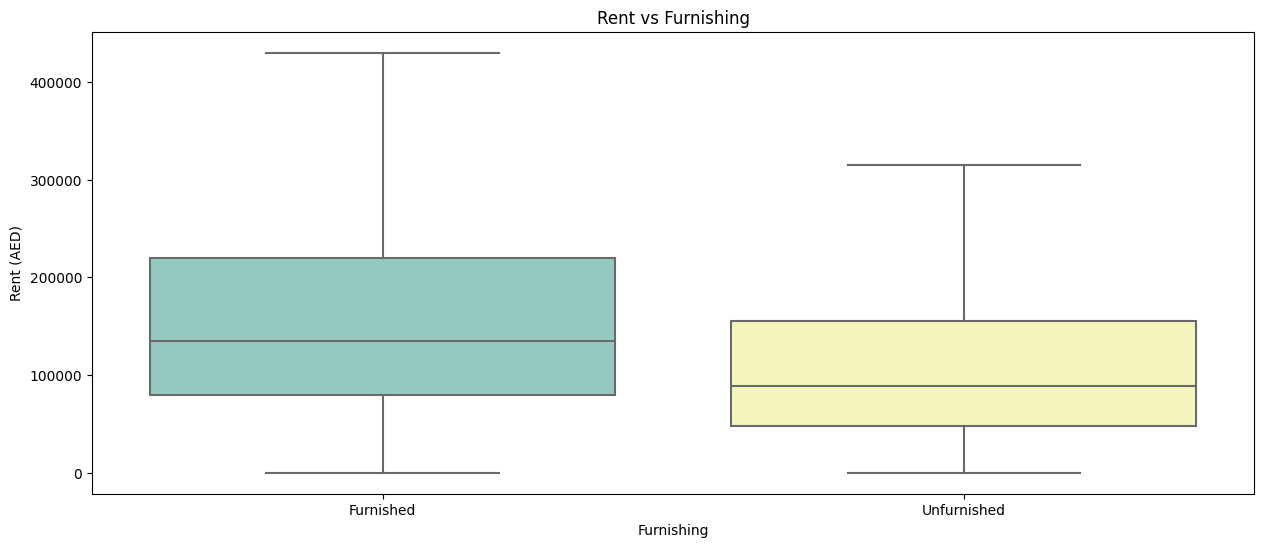

In [8]:
plt.figure(figsize=(15,6))
sns.boxplot(x="Type", y="Rent", data=df, showfliers=False, palette="Set2")
plt.xlabel("Property Type")
plt.ylabel("Rent (AED)")
plt.title("Rent vs Property Type")
plt.show()

plt.figure(figsize=(15,6))
sns.boxplot(x="Furnishing", y="Rent", data=df, showfliers=False, palette="Set3")
plt.xlabel("Furnishing")
plt.ylabel("Rent (AED)")
plt.title("Rent vs Furnishing")
plt.show()

/tmp/ipykernel_36/2760978197.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_locations = df.groupby("Location")["Rent"].mean().sort_values(ascending=False).head(60).reset_index()


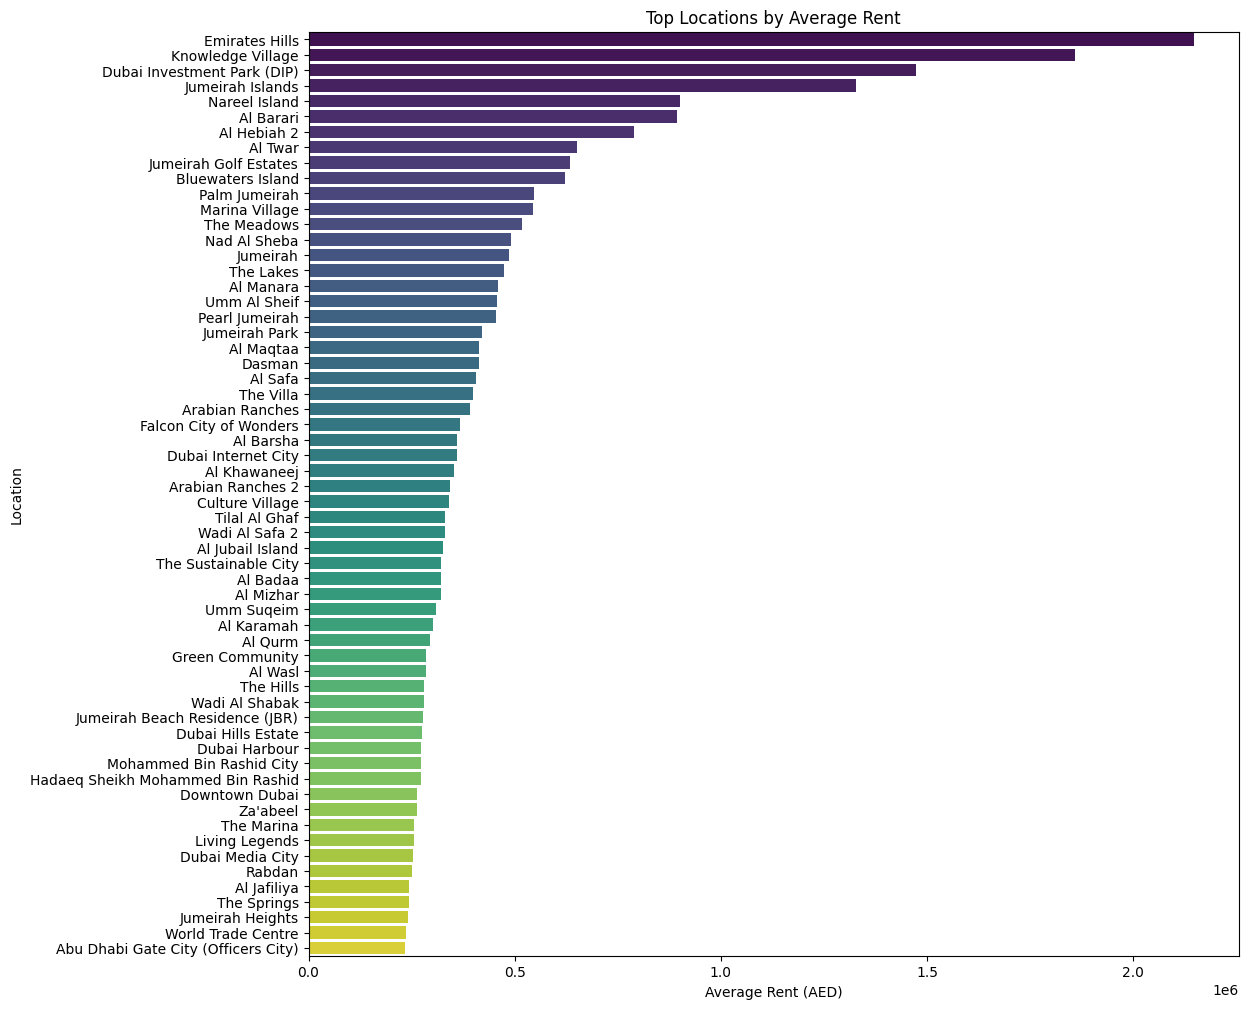

In [9]:
top_locations = df.groupby("Location")["Rent"].mean().sort_values(ascending=False).head(60).reset_index()
top_locations["Location"] = top_locations["Location"].astype(str)

plt.figure(figsize=(12,12))
sns.barplot(x="Rent", y="Location", data=top_locations, palette="viridis")
plt.xlabel("Average Rent (AED)")
plt.ylabel("Location")
plt.title("Top Locations by Average Rent")
plt.show()

/tmp/ipykernel_36/2834292105.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_rpsf = df.groupby("Location")["Rent_per_sqft"].mean().sort_values(ascending=False).head(60).reset_index()


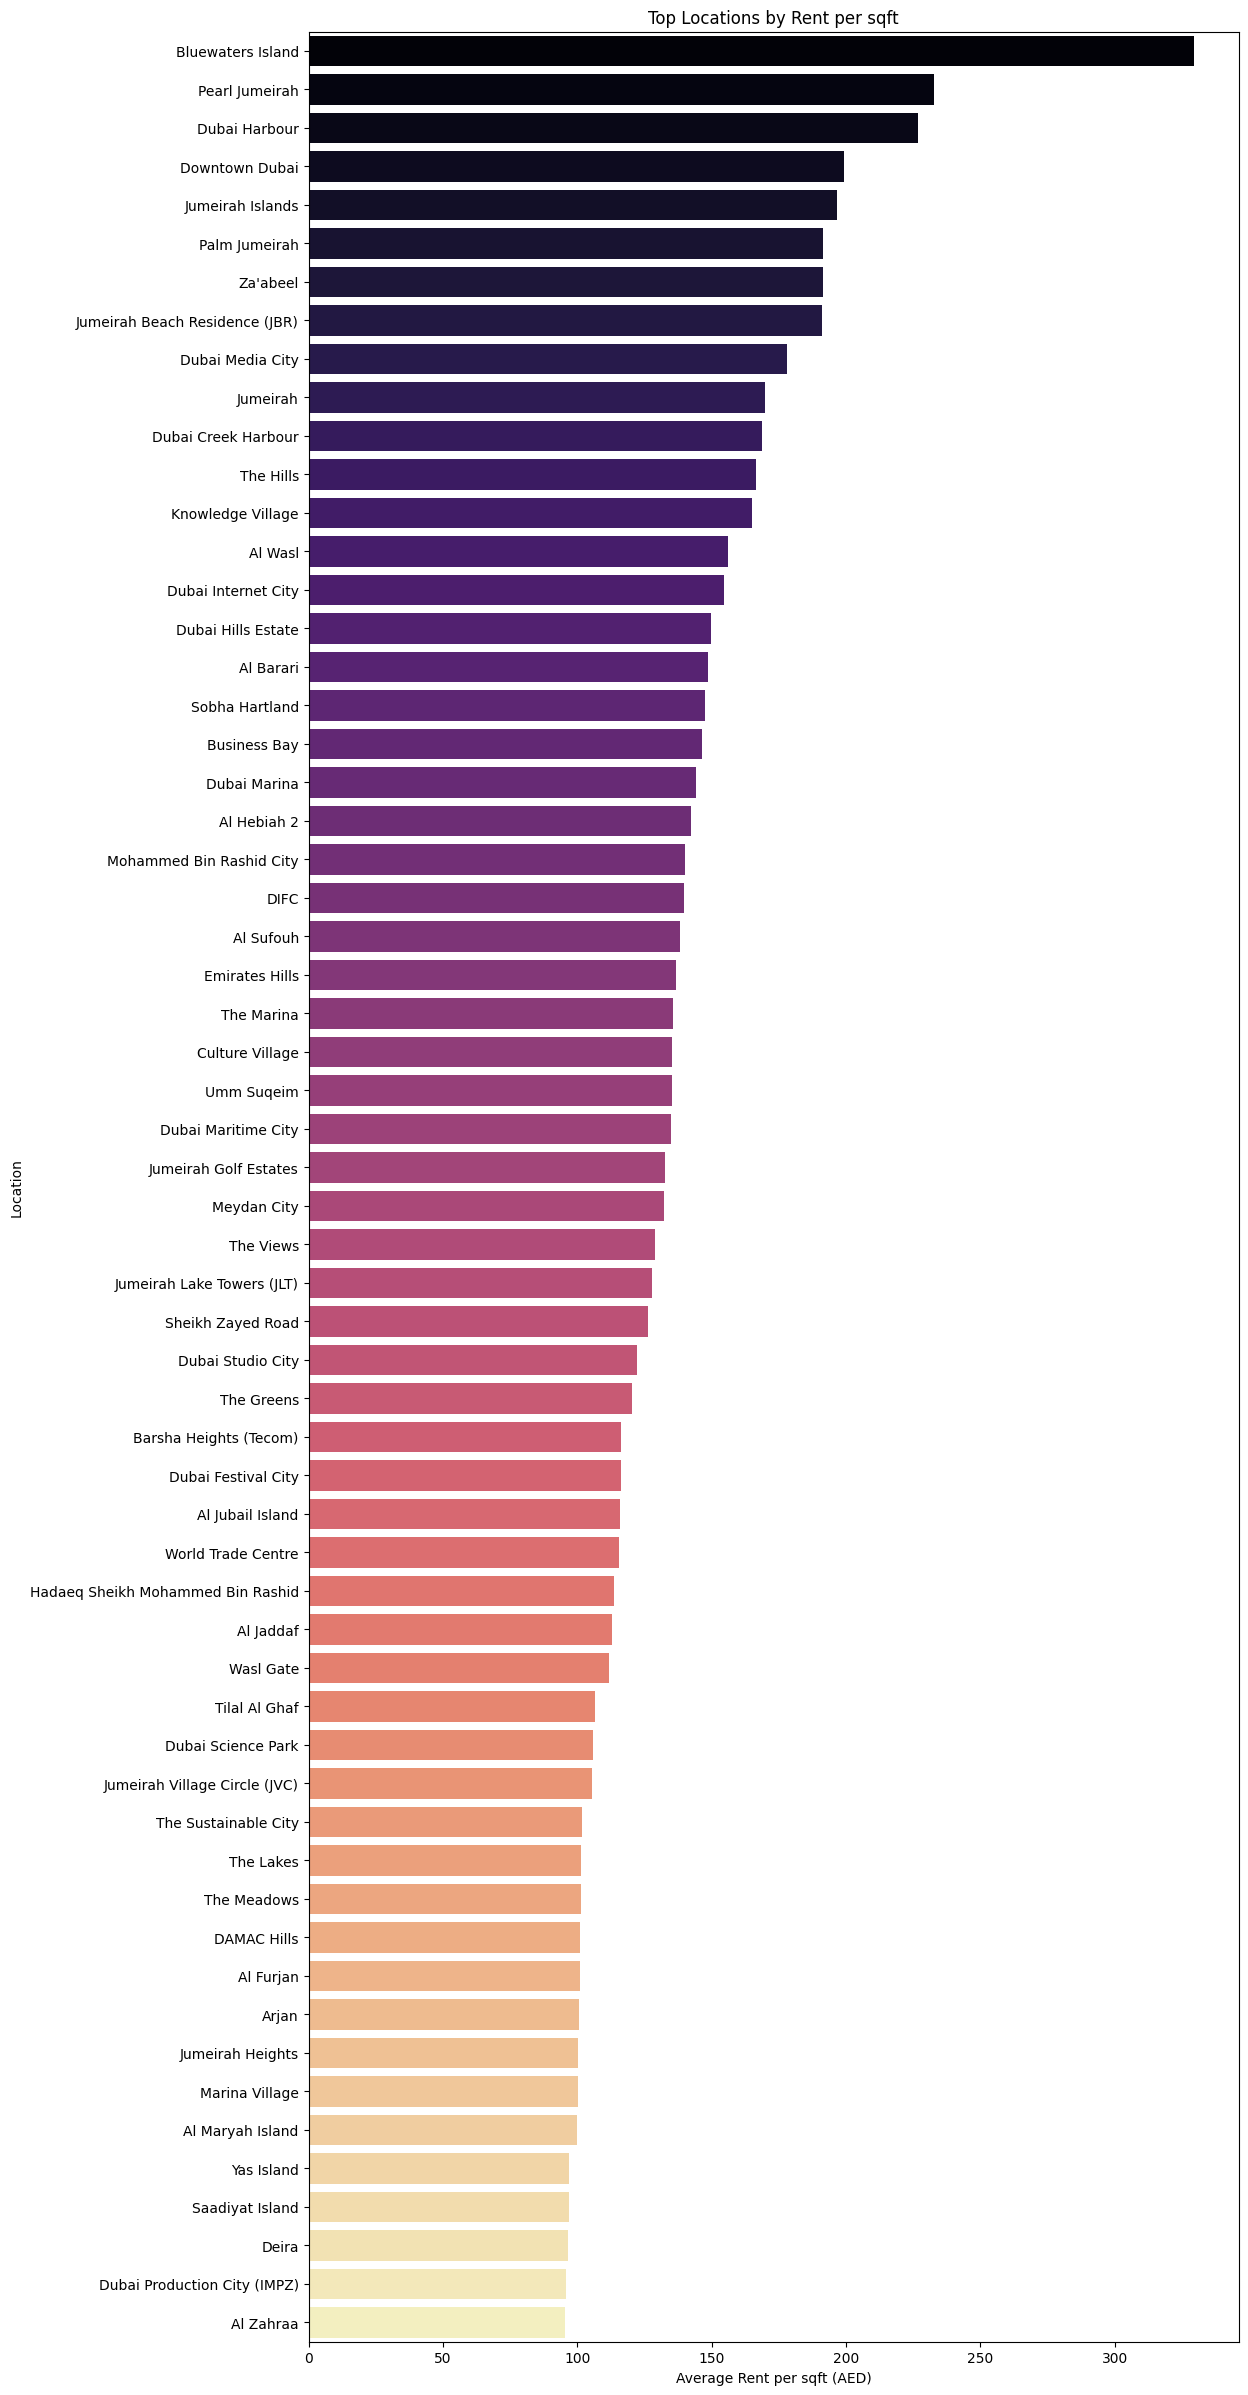

In [10]:
top_rpsf = df.groupby("Location")["Rent_per_sqft"].mean().sort_values(ascending=False).head(60).reset_index()
top_rpsf["Location"] = top_rpsf["Location"].astype(str)

plt.figure(figsize=(12,30))
sns.barplot(x="Rent_per_sqft", y="Location", data=top_rpsf, palette="magma")
plt.xlabel("Average Rent per sqft (AED)")
plt.ylabel("Location")
plt.title("Top Locations by Rent per sqft")
plt.show()

In [11]:
from folium.plugins import MarkerCluster

# Drop rows with missing coordinates
df_map = df.dropna(subset=["Latitude", "Longitude"])

# Create base map
m = folium.Map(location=[24.4, 54.4], zoom_start=7)

# Define colors for property types
type_colors = {
    "Apartment": "blue",
    "Villa": "green",
    "Townhouse": "purple",
    "Penthouse": "red",
    "Other": "orange"
}


marker_cluster = MarkerCluster().add_to(m)


for _, row in df_map.iterrows():
    color = type_colors.get(row["Type"], "gray")
    radius = max(2, min(10, row["Rent"]/50000))  # scale rent to radius
    
    popup_text = (
        f"<b>Address:</b> {row['Address']}<br>"
        f"<b>Type:</b> {row['Type']}<br>"
        f"<b>Rent:</b> AED {row['Rent']:,}<br>"
        f"<b>Beds:</b> {row['Beds']} | <b>Baths:</b> {row['Baths']}<br>"
        f"<b>Furnishing:</b> {row['Furnishing']}<br>"
        f"<b>Area:</b> {row['Area_in_sqft']} sqft"
    )
    
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=radius,
        color=color,
        fill=True,
        fill_opacity=0.6,
        popup=folium.Popup(popup_text, max_width=300)
    ).add_to(marker_cluster)


m.save("/kaggle/working/rent_map.html")

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import folium
from folium.plugins import MarkerCluster


df_map = df.dropna(subset=["Latitude", "Longitude"]).copy()


geo_features = df_map[["Latitude", "Longitude", "Rent_per_sqft"]]
scaler = StandardScaler()
geo_scaled = scaler.fit_transform(geo_features)

k = 20
kmeans = KMeans(n_clusters=k, random_state=42)
df_map["Geo_Cluster"] = kmeans.fit_predict(geo_scaled)


num_features = ["Area_in_sqft", "Beds", "Baths", "Rent_per_sqft"]
cat_features = ["Type", "Furnishing", "Geo_Cluster"]

X = df_map[num_features + cat_features]
y = df_map["Rent"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer([
    ("num", "passthrough", num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])

model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])


model.fit(X_train, y_train)


y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.3f}")

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


RMSE: 196846.08, MAE: 56878.91, R²: 0.503


In [13]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


num_features = ["Beds", "Baths", "Area_in_sqft", "Rent_per_sqft", "Age_of_listing_in_days"]
cat_features = ["Type", "Frequency", "Furnishing", "Purpose", "Geo_Cluster"]

X = df_map[num_features + cat_features]
y = df_map["Rent"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# One-hot encode categorical features, passthrough numeric
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse=False), cat_features)
    ],
    remainder="passthrough"  # numeric features
)

pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state=42, n_jobs=-1))
])


param_dist = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [None, 10, 20, 30],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features": ["auto", "sqrt", "log2"]
}

random_search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=20,  # try 20 random combinations
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    scoring="r2"
)


random_search.fit(X_train, y_train)


y_pred = random_search.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best parameters: {random_search.best_params_}")
print(f"RMSE: {rmse:,.2f}, MAE: {mae:,.2f}, R²: {r2:.3f}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

Best parameters: {'model__n_estimators': 300, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_features': 'log2', 'model__max_depth': 30}
RMSE: 111,965.25, MAE: 10,898.59, R²: 0.839


In [14]:
df_map.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73023 entries, 0 to 73738
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Address                 73023 non-null  object        
 1   Rent                    73023 non-null  int64         
 2   Beds                    73023 non-null  int64         
 3   Baths                   73023 non-null  int64         
 4   Type                    73023 non-null  category      
 5   Area_in_sqft            73023 non-null  int64         
 6   Rent_per_sqft           73023 non-null  float64       
 7   Rent_category           73023 non-null  category      
 8   Frequency               73023 non-null  category      
 9   Furnishing              73023 non-null  category      
 10  Purpose                 73023 non-null  category      
 11  Posted_date             73023 non-null  datetime64[ns]
 12  Age_of_listing_in_days  73023 non-null  int64      

In [15]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# -------------------------
# Ensure Geo_Cluster exists
# -------------------------
if "Geo_Cluster" not in df_map.columns:
    from sklearn.preprocessing import StandardScaler
    from sklearn.cluster import KMeans
    
    geo_features = df_map[["Latitude", "Longitude", "Rent_per_sqft"]]
    scaler = StandardScaler()
    geo_scaled = scaler.fit_transform(geo_features)

    k = 33  # adjust if needed
    kmeans = KMeans(n_clusters=k, random_state=42)
    df_map["Geo_Cluster"] = kmeans.fit_predict(geo_scaled)


num_features = ["Beds", "Baths", "Area_in_sqft", "Rent_per_sqft", "Age_of_listing_in_days"]
cat_features = ["Type", "Frequency", "Furnishing", "Purpose", "Geo_Cluster"]

X = df_map[num_features + cat_features]
y = df_map["Rent"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse=False), cat_features)
    ],
    remainder="passthrough"
)

pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", XGBRegressor(
        objective="reg:squarederror",
        random_state=42,
        n_jobs=-1
    ))
])

param_dist = {
    "model__n_estimators": [200, 220, 240, 260, 280, 300],
    "model__max_depth": [4, 5, 6],
    "model__learning_rate": [0.01, 0.03, 0.05, 0.07],
    "model__subsample": [0.7, 0.8, 0.9, 1.0],
    "model__colsample_bytree": [0.7, 0.8, 0.9, 1.0],
    "model__reg_alpha": [0, 0.01, 0.1, 1, 2, 3],
    "model__reg_lambda": [1, 1.5, 2, 3, 4, 5]
}

random_search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    scoring="r2"
)


# Split train for validation
X_train_fit, X_val_fit, y_train_fit, y_val_fit = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Fit manually with early stopping
best_model = XGBRegressor(
    objective="reg:squarederror",
    n_jobs=-1,
    random_state=42
)

# Preprocess features
preprocessor.fit(X_train_fit)
X_train_enc = preprocessor.transform(X_train_fit)
X_val_enc = preprocessor.transform(X_val_fit)
X_test_enc = preprocessor.transform(X_test)

best_model.fit(
    X_train_enc, y_train_fit,
    eval_set=[(X_val_enc, y_val_fit)],
    early_stopping_rounds=20,
    verbose=True
)


y_pred_train = best_model.predict(X_train_enc)
y_pred_test = best_model.predict(X_test_enc)

rmse_train = np.sqrt(mean_squared_error(y_train_fit, y_pred_train))
mae_train = mean_absolute_error(y_train_fit, y_pred_train)
r2_train = r2_score(y_train_fit, y_pred_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("----- Train Metrics -----")
print(f"RMSE: {rmse_train:,.2f}, MAE: {mae_train:,.2f}, R²: {r2_train:.3f}\n")

print("----- Test Metrics -----")
print(f"RMSE: {rmse_test:,.2f}, MAE: {mae_test:,.2f}, R²: {r2_test:.3f}")

random_search.fit(X_train, y_train)
print(f"Best hyperparameters: {random_search.best_params_}")



/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[0]	validation_0-rmse:160429.80528
[1]	validation_0-rmse:122022.79284
[2]	validation_0-rmse:93363.81792
[3]	validation_0-rmse:75294.70069
[4]	validation_0-rmse:60559.50114
[5]	validation_0-rmse:53738.84279
[6]	validation_0-rmse:48888.40744
[7]	validation_0-rmse:47173.55318
[8]	validation_0-rmse:45248.15235
[9]	validation_0-rmse:44204.03862
[10]	validation_0-rmse:44254.87269
[11]	validation_0-rmse:43634.22173
[12]	validation_0-rmse:42786.21992
[13]	validation_0-rmse:42471.11820
[14]	validation_0-rmse:42047.31029
[15]	validation_0-rmse:42255.42735
[16]	validation_0-rmse:41972.07238
[17]	validation_0-rmse:41860.24614
[18]	validation_0-rmse:41763.07510
[19]	validation_0-rmse:41703.90431
[20]	validation_0-rmse:41604.17512
[21]	validation_0-rmse:41627.50660


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[22]	validation_0-rmse:41535.77287
[23]	validation_0-rmse:41641.11934
[24]	validation_0-rmse:41716.19479
[25]	validation_0-rmse:41785.31578
[26]	validation_0-rmse:41850.08897
[27]	validation_0-rmse:41887.80018
[28]	validation_0-rmse:42013.55280
[29]	validation_0-rmse:42060.23037
[30]	validation_0-rmse:42106.91539
[31]	validation_0-rmse:41995.13857
[32]	validation_0-rmse:41896.19161
[33]	validation_0-rmse:41770.61753
[34]	validation_0-rmse:41757.37488
[35]	validation_0-rmse:41678.30180
[36]	validation_0-rmse:41598.43619
[37]	validation_0-rmse:41625.79478
[38]	validation_0-rmse:41619.13320
[39]	validation_0-rmse:41680.42538
[40]	validation_0-rmse:41586.32938
[41]	validation_0-rmse:41550.32138
[42]	validation_0-rmse:41519.45517
[43]	validation_0-rmse:41466.96191
[44]	validation_0-rmse:41440.22445
[45]	validation_0-rmse:41423.50766
[46]	validation_0-rmse:41428.44319
[47]	validation_0-rmse:41426.99106
[48]	validation_0-rmse:41499.14173
[49]	validation_0-rmse:41480.21814
[50]	validation_0-rm

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

Best hyperparameters: {'model__subsample': 1.0, 'model__reg_lambda': 1, 'model__reg_alpha': 2, 'model__n_estimators': 220, 'model__max_depth': 4, 'model__learning_rate': 0.05, 'model__colsample_bytree': 0.8}


Folium map saved as rent_predictions_map.html — open it in your browser.


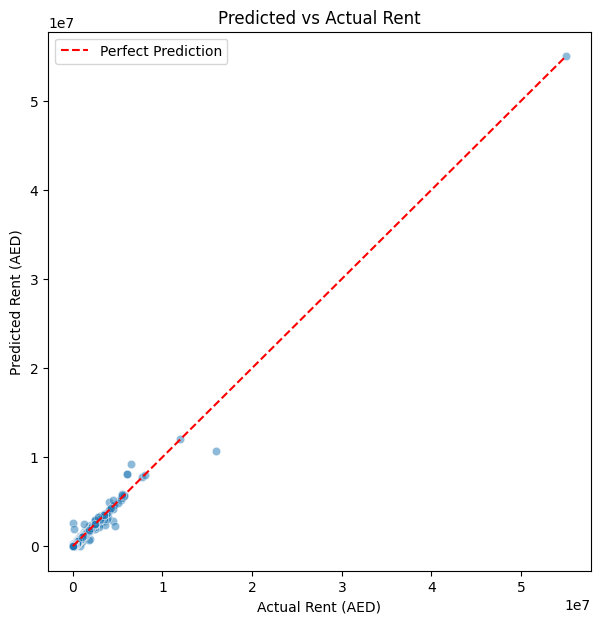

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


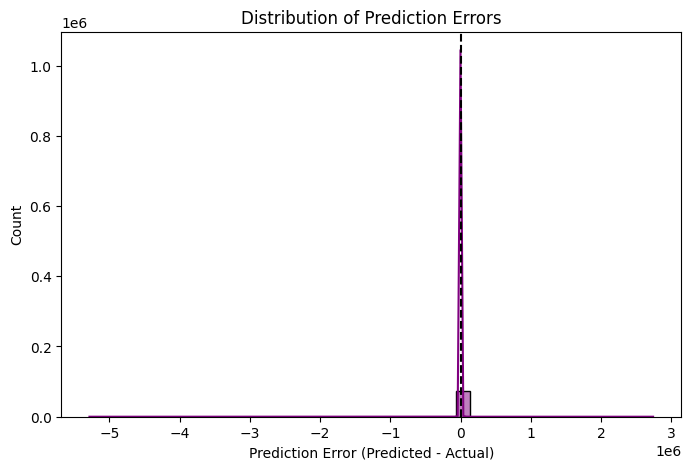


----- Top 15 Underpriced Properties -----


,Type,Area_in_sqft,Rent,Predicted_Rent,Error
31677,Villa,23745,16000000,1.071835e+07,-5.281651e+06
33645,Villa,39243,4750000,2.302630e+06,-2.447370e+06
21749,Residential Building,108000,4500000,2.787002e+06,-1.712998e+06
49684,Apartment,3739,3600000,2.407570e+06,-1.192430e+06
61139,Villa,46474,1800000,6.858370e+05,-1.114163e+06
17690,Villa,35000,1900000,8.440121e+05,-1.055988e+06
27407,Residential Building,100000,788400,-1.202104e+03,-7.896021e+05
53080,Penthouse,6551,3800000,3.028474e+06,-7.715255e+05
58455,Residential Building,10000,2900000,2.135037e+06,-7.649632e+05
46101,Apartment,6551,3500000,2.815632e+06,-6.843678e+05



----- Top 15 Overpriced Properties -----


,Type,Area_in_sqft,Rent,Predicted_Rent,Error
23943,Residential Building,10000,6500000,9238562.00,2738562.00
24410,Residential Building,1000,50000,2599978.50,2549978.50
43415,Villa,9500,6000000,8088961.50,2088961.50
58646,Villa,9505,6000000,8075963.00,2075963.00
56097,Apartment,93,170000,1904461.25,1734461.25
60492,Villa,2748,1200000,2521825.25,1321825.25
50144,Villa,9500,4000000,4948313.00,948313.00
61705,Villa,16216,4500000,5203435.00,703435.00
63153,Villa,7000,2800000,3324494.00,524494.00
23175,Residential Building,5500,1800000,2275132.50,475132.50


In [16]:
import folium
from folium.plugins import MarkerCluster, HeatMap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

if "Predicted_Rent" not in df_map.columns:
    df_map["Predicted_Rent"] = best_model.predict(preprocessor.transform(df_map[num_features + cat_features]))

# Error column
df_map["Error"] = df_map["Predicted_Rent"] - df_map["Rent"]

# --------------------------------------------------
# 1. Folium Map
# --------------------------------------------------
m = folium.Map(location=[df_map['Latitude'].mean(), df_map['Longitude'].mean()],
               zoom_start=12, tiles="CartoDB positron")

# Marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Add circle markers
for _, row in df_map.iterrows():
    color = "green" if row["Error"] >= 0 else "red"
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=max(3, min(10, row["Rent"] / 50000)),  # scale by rent
        color=color,
        fill=True,
        fill_opacity=0.6,
        popup=(
            f"<b>Actual Rent:</b> AED {row['Rent']:,}<br>"
            f"<b>Predicted Rent:</b> AED {row['Predicted_Rent']:,}<br>"
            f"<b>Error:</b> {row['Error']:+,.0f}"
        ),
    ).add_to(marker_cluster)

# Heatmap of actual rents
heat_data = [[row['Latitude'], row['Longitude'], row['Rent']] for _, row in df_map.iterrows()]
HeatMap(heat_data, radius=15, blur=10, max_zoom=1).add_to(m)

m.save("rent_predictions_map.html")
print("Folium map saved as rent_predictions_map.html — open it in your browser.")

# --------------------------------------------------
# 2. Scatter Plot (Actual vs Predicted)
# --------------------------------------------------
plt.figure(figsize=(7, 7))
sns.scatterplot(x="Rent", y="Predicted_Rent", data=df_map, alpha=0.5)
plt.plot([df_map["Rent"].min(), df_map["Rent"].max()],
         [df_map["Rent"].min(), df_map["Rent"].max()],
         color="red", linestyle="--", label="Perfect Prediction")
plt.xlabel("Actual Rent (AED)")
plt.ylabel("Predicted Rent (AED)")
plt.title("Predicted vs Actual Rent")
plt.legend()
plt.show()

# --------------------------------------------------
# 3. Residual Plot
# --------------------------------------------------
plt.figure(figsize=(8, 5))
sns.histplot(df_map["Error"], bins=40, kde=True, color="purple")
plt.axvline(0, color="black", linestyle="--")
plt.xlabel("Prediction Error (Predicted - Actual)")
plt.ylabel("Count")
plt.title("Distribution of Prediction Errors")
plt.show()

# --------------------------------------------------
# 4. Tabular Summary
# --------------------------------------------------
# Top underpriced & overpriced properties
underpriced = df_map.sort_values("Error").head(15)[["Type", "Area_in_sqft", "Rent", "Predicted_Rent", "Error"]]
overpriced = df_map.sort_values("Error", ascending=False).head(15)[["Type", "Area_in_sqft", "Rent", "Predicted_Rent", "Error"]]

print("\n----- Top 15 Underpriced Properties -----")
display(underpriced)

print("\n----- Top 15 Overpriced Properties -----")
display(overpriced)


In [17]:
import folium
from folium.plugins import MarkerCluster, HeatMap
import matplotlib.pyplot as plt
import seaborn as sns

df_map["Predicted_Rent"] = best_model.predict(preprocessor.transform(df_map[num_features + cat_features]))
df_map["Error"] = df_map["Predicted_Rent"] - df_map["Rent"]
df_map["%Error"] = (df_map["Error"] / df_map["Rent"]) * 100


m = folium.Map(location=[df_map['Latitude'].mean(), df_map['Longitude'].mean()],
               zoom_start=11, tiles="CartoDB positron")

marker_cluster = MarkerCluster().add_to(m)

for _, row in df_map.iterrows():
    # Color scale: strong red for overpriced, strong green for underpriced
    if row["Error"] > 0:
        color = "darkred" if row["%Error"] > 50 else "red"
    else:
        color = "darkgreen" if row["%Error"] < -50 else "green"

    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=max(3, min(10, row["Rent"] / 1e6)),  # scale by rent
        color=color,
        fill=True,
        fill_opacity=0.6,
        popup=(
            f"<b>Type:</b> {row['Type']}<br>"
            f"<b>Area:</b> {row['Area_in_sqft']:,} sqft<br>"
            f"<b>Actual Rent:</b> AED {row['Rent']:,}<br>"
            f"<b>Predicted Rent:</b> AED {int(row['Predicted_Rent']):,}<br>"
            f"<b>Error:</b> {int(row['Error']):+,}<br>"
            f"<b>% Error:</b> {row['%Error']:+.1f}%"
        ),
    ).add_to(marker_cluster)

# Improved Heatmap (weighted by actual rent, normalized)
heat_data = [[row['Latitude'], row['Longitude'], min(row['Rent'] / 1e6, 5)] for _, row in df_map.iterrows()]
HeatMap(heat_data, radius=18, blur=12, max_zoom=1).add_to(m)

m.save("rent_predictions_map.html")
print("Updated folium map saved as rent_predictions_map.html")


def format_table(df, n=15, asc=True):
    table = df.sort_values("Error", ascending=asc).head(n).copy()
    table["Rent"] = table["Rent"].apply(lambda x: f"{x:,.0f}")
    table["Predicted_Rent"] = table["Predicted_Rent"].apply(lambda x: f"{int(x):,}")
    table["Error"] = table["Error"].apply(lambda x: f"{int(x):+,}")
    table["%Error"] = table["%Error"].apply(lambda x: f"{x:+.1f}%")
    return table[["Type", "Area_in_sqft", "Rent", "Predicted_Rent", "Error", "%Error"]]

print("\n----- Top 15 Underpriced Properties -----")
display(format_table(df_map, n=15, asc=True))

print("\n----- Top 15 Overpriced Properties -----")
display(format_table(df_map, n=15, asc=False))


Updated folium map saved as rent_predictions_map.html

----- Top 15 Underpriced Properties -----


,Type,Area_in_sqft,Rent,Predicted_Rent,Error,%Error
31677,Villa,23745,"16,000,000","10,718,349","-5,281,651",-33.0%
33645,Villa,39243,"4,750,000","2,302,630","-2,447,369",-51.5%
21749,Residential Building,108000,"4,500,000","2,787,001","-1,712,998",-38.1%
49684,Apartment,3739,"3,600,000","2,407,569","-1,192,430",-33.1%
61139,Villa,46474,"1,800,000","685,837","-1,114,163",-61.9%
17690,Villa,35000,"1,900,000","844,012","-1,055,987",-55.6%
27407,Residential Building,100000,"788,400","-1,202","-789,602",-100.2%
53080,Penthouse,6551,"3,800,000","3,028,474","-771,525",-20.3%
58455,Residential Building,10000,"2,900,000","2,135,036","-764,963",-26.4%
46101,Apartment,6551,"3,500,000","2,815,632","-684,367",-19.6%



----- Top 15 Overpriced Properties -----


,Type,Area_in_sqft,Rent,Predicted_Rent,Error,%Error
23943,Residential Building,10000,"6,500,000","9,238,562","+2,738,562",+42.1%
24410,Residential Building,1000,"50,000","2,599,978","+2,549,978",+5100.0%
43415,Villa,9500,"6,000,000","8,088,961","+2,088,961",+34.8%
58646,Villa,9505,"6,000,000","8,075,963","+2,075,963",+34.6%
56097,Apartment,93,"170,000","1,904,461","+1,734,461",+1020.3%
60492,Villa,2748,"1,200,000","2,521,825","+1,321,825",+110.2%
50144,Villa,9500,"4,000,000","4,948,313","+948,313",+23.7%
61705,Villa,16216,"4,500,000","5,203,435","+703,435",+15.6%
63153,Villa,7000,"2,800,000","3,324,494","+524,494",+18.7%
23175,Residential Building,5500,"1,800,000","2,275,132","+475,132",+26.4%


In [18]:
import folium
from folium.plugins import MarkerCluster, HeatMap
import pandas as pd

# --- Prepare Data for Mapping ---
# Make sure df_map already has ['Latitude','Longitude','Type','Area_in_sqft','Rent','Predicted_Rent']
df_map["Error"] = df_map["Rent"] - df_map["Predicted_Rent"]
df_map["Abs_Error"] = df_map["Error"].abs()
df_map["Over_Under"] = df_map["Error"]  # + = overpriced, - = underpriced

# --- Folium Map Setup ---
m = folium.Map(location=[df_map["Latitude"].mean(), df_map["Longitude"].mean()],
               zoom_start=11, tiles="CartoDB positron")

# Marker cluster for clickable property info
marker_cluster = MarkerCluster().add_to(m)

for _, row in df_map.iterrows():
    popup_html = f"""
    <b>Type:</b> {row['Type']}<br>
    <b>Area (sqft):</b> {row['Area_in_sqft']:,}<br>
    <b>Actual Rent:</b> {row['Rent']:,}<br>
    <b>Predicted Rent:</b> {row['Predicted_Rent']:.0f}<br>
    <b>Error (Actual - Pred):</b> {row['Error']:.0f}
    """
    color = "green" if row["Error"] < 0 else "red"  # Green = underpriced, Red = overpriced

    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=5,
        popup=folium.Popup(popup_html, max_width=300),
        color=color,
        fill=True,
        fill_opacity=0.7
    ).add_to(marker_cluster)

heat_data = df_map[["Latitude", "Longitude", "Abs_Error"]].dropna().values.tolist()
HeatMap(heat_data, min_opacity=0.4, radius=15, blur=12, max_zoom=1).add_to(m)


m.save("rental_predictions_map.html")
print("Map saved as rental_predictions_map.html")


print("\n----- Top 15 Underpriced Properties -----\n")
underpriced = df_map.nsmallest(15, "Error")[["Type", "Area_in_sqft", "Rent", "Predicted_Rent", "Error"]]
print(underpriced.to_string(index=False))

print("\n----- Top 15 Overpriced Properties -----\n")
overpriced = df_map.nlargest(15, "Error")[["Type", "Area_in_sqft", "Rent", "Predicted_Rent", "Error"]]
print(overpriced.to_string(index=False))


Map saved as rental_predictions_map.html

----- Top 15 Underpriced Properties -----

                Type  Area_in_sqft    Rent  Predicted_Rent       Error
Residential Building         10000 6500000      9238562.00 -2738562.00
Residential Building          1000   50000      2599978.50 -2549978.50
               Villa          9500 6000000      8088961.50 -2088961.50
               Villa          9505 6000000      8075963.00 -2075963.00
           Apartment            93  170000      1904461.25 -1734461.25
               Villa          2748 1200000      2521825.25 -1321825.25
               Villa          9500 4000000      4948313.00  -948313.00
               Villa         16216 4500000      5203435.00  -703435.00
               Villa          7000 2800000      3324494.00  -524494.00
Residential Building          5500 1800000      2275132.50  -475132.50
Residential Building          5134 1850000      2275238.00  -425238.00
           Apartment          6134 2500000      2920557.50  -42

In [19]:
import folium
from folium.plugins import HeatMap, MarkerCluster
import numpy as np

# --- Prepare Data ---
# Assuming df has ['latitude','longitude','Type','Area_in_sqft','Rent','Predicted_Rent','Error']
df_map['Abs_Error'] = df_map['Error'].abs()
df_map['Over_Under'] = df_map['Rent'] - df_map['Predicted_Rent']  # + = overpriced, - = underpriced

# Initialize map centered on Dubai
m = folium.Map(location=[25.276987, 55.296249], zoom_start=11, tiles="cartodbpositron")

# --- Marker Cluster with detailed popups ---
marker_cluster = MarkerCluster(name="Property Listings").add_to(m)

for _, row in df_map.iterrows():
    popup_html = f"""
    <b>Type:</b> {row['Type']}<br>
    <b>Area (sqft):</b> {row['Area_in_sqft']}<br>
    <b>Actual Rent:</b> {row['Rent']:,.0f}<br>
    <b>Predicted Rent:</b> {row['Predicted_Rent']:,.0f}<br>
    <b>Error:</b> {row['Error']:,.0f}<br>
    <b>Status:</b> {"Overpriced" if row['Over_Under']>0 else "Underpriced"}
    """
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_html,
        icon=folium.Icon(color="blue", icon="home", prefix="fa")
    ).add_to(marker_cluster)

# --- Rent Heatmap ---
rent_data = df_map[['Latitude', 'Longitude', 'Predicted_Rent']].values.tolist()
HeatMap(rent_data, 
        name="Rent Heatmap",
        min_opacity=0.4,
        max_zoom=15,
        radius=12,
        blur=18,
        max_val=float(df_map['Predicted_Rent'].max())).add_to(m)

# --- Over/Underpricing Heatmap ---
# Normalize values for heatmap intensity
ou_scaled = (df_map['Over_Under'] - df_map['Over_Under'].min()) / (df_map['Over_Under'].max() - df_map['Over_Under'].min())
ou_data = df_map[['Latitude', 'Longitude']].copy()
ou_data['intensity'] = ou_scaled
HeatMap(ou_data[['Latitude','Longitude','intensity']].values.tolist(),
        name="Over/Underpricing Heatmap",
        min_opacity=0.4,
        max_zoom=15,
        radius=12,
        blur=18).add_to(m)

# --- Error Heatmap ---
err_scaled = df_map['Abs_Error'] / df_map['Abs_Error'].max()
err_data = df_map[['Latitude','Longitude']].copy()
err_data['intensity'] = err_scaled
HeatMap(err_data[['Latitude','Longitude','intensity']].values.tolist(),
        name="Error Heatmap",
        min_opacity=0.4,
        max_zoom=15,
        radius=12,
        blur=18).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Save map
m.save("dubai_rent_predictions.html")
print("Interactive map saved as dubai_rent_predictions.html")

# --- Tabular Insights ---
print("\n----- Top 15 Underpriced Properties -----\n")
underpriced = df_map.nsmallest(15, "Error")[["Type", "Area_in_sqft", "Rent", "Predicted_Rent", "Error"]]
print(underpriced.to_string(index=False))

print("\n----- Top 15 Overpriced Properties -----\n")
overpriced = df_map.nlargest(15, "Error")[["Type", "Area_in_sqft", "Rent", "Predicted_Rent", "Error"]]
print(overpriced.to_string(index=False))


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   5.2s
[CV] END model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=300; total time=  14.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=2, model__n_estimators=100; total time=  29.9s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100; total time=  25.3s
[CV] END model__max_depth=30, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=5, model__n_estimators=300; total time= 1.3min
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=2, model__min_samples_split=10, model__n_estimators=300; total time= 1.4min
[CV] END model__max_depth=20, model__max_features=auto, model__min_

/tmp/ipykernel_36/1607835614.py:33: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(rent_data,


[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=10, model__n_estimators=100; total time=   5.1s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   4.9s
[CV] END model__max_depth=10, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=300; total time=  14.1s
[CV] END model__max_depth=20, model__max_features=auto, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100; total time=  26.5s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_leaf=4, model__min_samples_split=2, model__n_estimators=100; total time=   5.6s
[CV] END model__max_depth=20, model__max_features=log2, model__min_samples_leaf=1, model__min_samples_split=5, model__n_estimators=100; total time=   8.3s
[CV] END model__max_depth=20, model__max_features=sqrt, model__min_sa

In [20]:
import folium
from folium.plugins import HeatMap, MarkerCluster
import pandas as pd
import numpy as np

# --- Prepare Data ---
df_map['Abs_Error'] = df_map['Error'].abs()
df_map['Over_Under'] = df_map['Rent'] - df_map['Predicted_Rent']  # + = overpriced, - = underpriced

# Format numbers for display
pd.options.display.float_format = '{:,.0f}'.format
df_map['Rent_fmt'] = df_map['Rent']
df_map['Predicted_Rent_fmt'] = df_map['Predicted_Rent']
df_map['Error_fmt'] = df_map['Error']

# --- Initialize Map ---
m = folium.Map(location=[25.276987, 55.296249], zoom_start=11, tiles="cartodbpositron")

# --- Marker Cluster with detailed scrollable popups ---
marker_cluster = MarkerCluster(disableClusteringAtZoom=15, name="Property Listings").add_to(m)

for _, row in df_map.iterrows():
    popup_html = f"""
    <div style="max-height:300px;overflow:auto;">
        <b>Address:</b> {row['Address']}<br>
        <b>Type:</b> {row['Type']}<br>
        <b>Area (sqft):</b> {row['Area_in_sqft']}<br>
        <b>Rent:</b> {row['Rent_fmt']:,}<br>
        <b>Predicted Rent:</b> {row['Predicted_Rent_fmt']:,}<br>
        <b>Error:</b> {row['Error_fmt']:,}<br>
        <b>Status:</b> {"Overpriced" if row['Over_Under']>0 else "Underpriced"}
    </div>
    """
    # Color coding for over/underpriced
    color = "red" if row['Over_Under']>0 else "green"
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_html,
        icon=folium.Icon(color=color, icon="home", prefix="fa")
    ).add_to(marker_cluster)

# --- Heatmaps ---
# Rent Heatmap
rent_data = df_map[['Latitude', 'Longitude', 'Predicted_Rent']].values.tolist()
HeatMap(rent_data, name="Rent Heatmap", min_opacity=0.4, max_zoom=15, radius=12, blur=18,
        max_val=float(df_map['Predicted_Rent'].max())).add_to(m)

# Over/Underpricing Heatmap
ou_scaled = (df_map['Over_Under'] - df_map['Over_Under'].min()) / (df_map['Over_Under'].max() - df_map['Over_Under'].min())
ou_data = df_map[['Latitude', 'Longitude']].copy()
ou_data['intensity'] = ou_scaled
HeatMap(ou_data[['Latitude','Longitude','intensity']].values.tolist(), name="Over/Underpricing Heatmap",
        min_opacity=0.4, max_zoom=15, radius=12, blur=18).add_to(m)

# Error Heatmap
err_scaled = df_map['Abs_Error'] / df_map['Abs_Error'].max()
err_data = df_map[['Latitude','Longitude']].copy()
err_data['intensity'] = err_scaled
HeatMap(err_data[['Latitude','Longitude','intensity']].values.tolist(), name="Error Heatmap",
        min_opacity=0.4, max_zoom=15, radius=12, blur=18).add_to(m)

# Layer control
folium.LayerControl().add_to(m)

# Save map
m.save("dubai_rent_predictions.html")
print("Interactive map saved as dubai_rent_predictions.html")

# --- Tabular Insights ---
print("\n----- Top 15 Underpriced Properties -----\n")
underpriced = df_map.nsmallest(15, "Error")[["Address","Type", "Area_in_sqft", "Rent_fmt", "Predicted_Rent_fmt", "Error_fmt"]]
print(underpriced.to_string(index=False))

print("\n----- Top 15 Overpriced Properties -----\n")
overpriced = df_map.nlargest(15, "Error")[["Address","Type", "Area_in_sqft", "Rent_fmt", "Predicted_Rent_fmt", "Error_fmt"]]
print(overpriced.to_string(index=False))


/tmp/ipykernel_36/3599569276.py:45: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(rent_data, name="Rent Heatmap", min_opacity=0.4, max_zoom=15, radius=12, blur=18,


Interactive map saved as dubai_rent_predictions.html

----- Top 15 Underpriced Properties -----

                                                                            Address                 Type  Area_in_sqft  Rent_fmt  Predicted_Rent_fmt  Error_fmt
                                                                Al Rashidiya, Ajman Residential Building         10000   6500000           9,238,562 -2,738,562
                                                                    Al Rawda, Ajman Residential Building          1000     50000           2,599,978 -2,549,978
     Signature Villas Frond G, Signature Villas Palm Jumeirah, Palm Jumeirah, Dubai                Villa          9500   6000000           8,088,962 -2,088,962
     Signature Villas Frond G, Signature Villas Palm Jumeirah, Palm Jumeirah, Dubai                Villa          9505   6000000           8,075,963 -2,075,963
                                              Forte 1, Forte, Downtown Dubai, Dubai            Apartmen

In [21]:
df_map["Error"] = df_map["Predicted_Rent"] - df_map["Rent"]   # compute error
df_map["Error_Percent"] = (df_map["Error"] / df_map["Rent"]) * 100

def classify_price(err_pct, threshold=5):   # threshold in %
    if abs(err_pct) <= threshold:
        return "Fair"
    elif err_pct > threshold:
        return "Overpriced"
    else:
        return "Underpriced"

df_map["Price_Status"] = df_map["Error_Percent"].apply(lambda x: classify_price(x, threshold=5))


df_map.to_csv("dubai_rent_predictions_with_status.csv", index=False)
print("CSV saved as 'dubai_rent_predictions_with_status.csv'")

CSV saved as 'dubai_rent_predictions_with_status.csv'
